# Text Preprocessing:
- Different interpretation and standards could lead to inconsistency in digital languages.
- Machines are sensitive to all those differences and interpret them differently.
- So, proper text preprocessing is needed to standarize all the available texts in dataset.
- Garbage-In-Garbage-Out => So, it is necessary to avoid plug-in good quality data to produce good results.

# Broadly divided into:
## - Cleaning
- lower casing
- html/tags cleaning
- Unicode Normalization (eg. emoji)
- Spelling Check
- Others
## - Basic Preprocessing
### Basic
##### Tokenization
## - Advanced Preprocessing

# Using NLTK
- NLTK stands for Natural Language Toolkit
- Language processing tasks and corresponding NLTK modules with examples of functionality
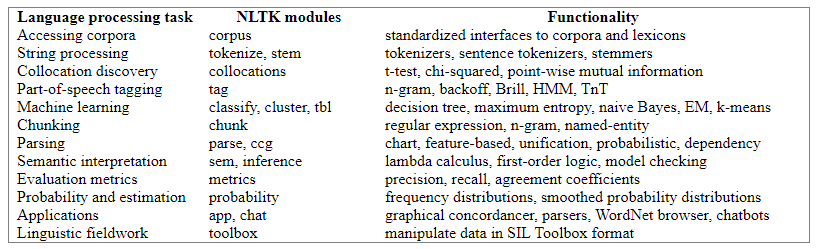

In [2]:
# Installation:
!pip install nltk

In [3]:
# Downloading datasets(optional):
import nltk 
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## 1) Lower Case Conversion:
- Processing of converting all the word from corpus to same case. (here, using lower case)
- Don't want our model to get confused by seeing the same word with various casing.
- example => Converting "Processing" to "processing"
- Problems without lower casing:
    - Both words are treated as different one.
    - Increase the vocabulary in word corpus.
    - Higher vector dimension hence requiring more computation.



In [4]:
document = "The movie was good but lacks the realistic feeling"
document_lower = document.lower()
# for dataframe:
# df["reviews"].str.lower()
document_lower

'the movie was good but lacks the realistic feeling'

## 2) Removing unnecessary informations:
- Raw text contains many useless informations like html tags, emoji, punctuations, urls, and other unicode characters

In [5]:
# a) HTML tags:
import re

text = """<div>
<h1> H2O</h1>
<p> AutoML</p>
<a href="https://www.h2o.ai/products/h2o-driverless-ai/"> Driverless AI</a>
</div>"""

html_pattern = re.compile('<.*?>')
text_after_html = html_pattern.sub(r'', text)
print(text_after_html)


 H2O
 AutoML
 Driverless AI



In [6]:
# b) Remove URLs:
text = "The most news are scraped from the link https://example.com which provides example during learing."
url_pattern = re.compile(r'https?://\S+|www\. \S+')
text_after_url = url_pattern.sub(r'', text)
print(text_after_url)

The most news are scraped from the link  which provides example during learing.


In [7]:
# c) Remove emojis:
# Option 1: remove
# Option 2: replace with meaning

!pip install emoji
import emoji
text = "The game was on 🔥"
print(emoji.demojize(text))

The game was on :fire:


In [8]:
# d) Punctuation:
import string
text = "hello! how @re you doing? Hope yo're fine. (no problem)"
exclude = string.punctuation
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
for char in exclude:
    text = text.replace(char, '')
print(text)

hello how re you doing Hope yore fine no problem


## 3) Tokenization
- Breaking the text into smaller units called tokens.
- Why we need tokens?
    - Each tokens have semantic meaning and can exibit relations among other tokens (relatively coherent)
- a) Word Tokenization:
    - splitting the text on the basis of words.
    - words, numbers, punctuations, and others can be considered as a token
    - use ``` word_tokenize() ``` from ```nltk.tokenize```

- b) Sentence Tokenization:
    - splitting text into sentences
    - Each sentence is treated as token.
    - Usually seperate by full stop (.)
    - main focus is to study the structure of sentence in the analysis
    - user ```sent_tokenize()``` from ```nltk.tokenize```

- c) Regular Expression Tokenization: 
    - Using patterns to split text based on specific rules or conditions.

- See this for more : https://www.analyticsvidhya.com/blog/2019/07/how-get-started-nlp-6-unique-ways-perform-tokenization/

In [10]:
# a) word tokenization using NLTK:
from nltk.tokenize import word_tokenize

text = '''There are different methods we can use to do tokenization. For instance: tokenization can be done either using split function, 
regular expression, NLTK library, Spacy, Keras, and Gensim. Lets explore them one by one'''

tokens = word_tokenize(text)
print(tokens)

['There', 'are', 'different', 'methods', 'we', 'can', 'use', 'to', 'do', 'tokenization', '.', 'For', 'instance', ':', 'tokenization', 'can', 'be', 'done', 'either', 'using', 'split', 'function', ',', 'regular', 'expression', ',', 'NLTK', 'library', ',', 'Spacy', ',', 'Keras', ',', 'and', 'Gensim', '.', 'Lets', 'explore', 'them', 'one', 'by', 'one']


In [11]:
# Sentence tokenization using NLTK:
from nltk.tokenize import sent_tokenize
sent_tokens = sent_tokenize(text)
print(sent_tokens)

['There are different methods we can use to do tokenization.', 'For instance: tokenization can be done either using split function, \nregular expression, NLTK library, Spacy, Keras, and Gensim.', 'Lets explore them one by one']


## 4) Stop Word Removal:
- Stop words are those words that helps in formation but not in meaning.
- e.g: commonly used words like (a, the, are, and , my)
- These words doesn't posses significant meaning in the document.
- **In POS tagging, stop words are not removed.**
- NLTK library in python has list of stop words stored in 16 different languages.

In [12]:
# stop words removal:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
filtered_text = [word for word in tokens if word not in stop_words]
print(filtered_text)

['There', 'different', 'methods', 'use', 'tokenization', '.', 'For', 'instance', ':', 'tokenization', 'done', 'either', 'using', 'split', 'function', ',', 'regular', 'expression', ',', 'NLTK', 'library', ',', 'Spacy', ',', 'Keras', ',', 'Gensim', '.', 'Lets', 'explore', 'one', 'one']


## 5) Stemming:
- In grammar, **inflection** means the modification of word to express different grammatical categories such as tense, case, voice, aspect, person, number, gender and mood.
- **Stemming** is the process of reducing inflection back to root form.
- Mostly used in infomation Retrevial System
- It is algorithm based (Stemmer algorithm). So, *root word might not belong to the language*
- Examples:
    - root word "like" include:
        - likes
        - liked
        - likely
        - liking
    - root word "fina" include:
        - finally
        - final
        - finalized

- Error in stemming:

- Over Stemming:
    - It happens when two or more unrelated words are reduced to same stem even though they are have different meanings and are not same.
    - Refers to *false positive*.
    - Example:
        - University and universe
        - Some stemming algo may reduce both words to "univers" as root word which is completely wrong.

- Under Stemming: 
    - It happens when two or more related words should be reduced to same root word but are reduced to different stem.
    - Refers to *false negative*
    - Example:
        - data and datum.
        - Some stemming algo may reduce word "data" to "dat" and "datum" to "datu" respectively. This is wrong as both words should have same stem or root word.
        
- Stemming Algorithm in NLTK:
    - Porter Stemmer (for English)
    - Snow Ball Stemmer (Other Language) also called porter 2

In [14]:
# Stemming words:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

stem_token = [ps.stem(word) for word in tokens]
print(stem_token)

['there', 'are', 'differ', 'method', 'we', 'can', 'use', 'to', 'do', 'token', '.', 'for', 'instanc', ':', 'token', 'can', 'be', 'done', 'either', 'use', 'split', 'function', ',', 'regular', 'express', ',', 'nltk', 'librari', ',', 'spaci', ',', 'kera', ',', 'and', 'gensim', '.', 'let', 'explor', 'them', 'one', 'by', 'one']


## 6) Lemmatization:
- Converts inflected words to their word stem that belongs to original language unlike stemming.
- It is slower that stemming bcz it search in the existing lexical dictionary
- root word => lemma
- search based unlike stemming which was algorithm based.
- Most common lemmatizer is : Wordnet

In [19]:
# Lemmaization of words using wordnet:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer= WordNetLemmatizer()

print(wordnet_lemmatizer.lemmatize(text))


There are different methods we can use to do tokenization. For instance: tokenization can be done either using split function, 
regular expression, NLTK library, Spacy, Keras, and Gensim. Lets explore them one by one


- Notice that it didn't do well. Because 'are' is not converted to 'be' and 'using' is not converted to 'use' as expected.
- This is because lemmatization process depends on POS tags to come up with the correct lemma.
- Lets lemmatize "running" with and without POS tagger to illustrate this point.

In [22]:
print(wordnet_lemmatizer.lemmatize("running"))
print(wordnet_lemmatizer.lemmatize("running",'v'))

running
run


So, for a same word, the output lemma is different depending upon the POS tagging.

**Problem**:
- Not possible to provide POS tagging to large dataset manually

**Solution**:
- Find out the corresponding POS tags and pass it to the lemmatizer. But lemmatizer only accepts single character which needs to be mapped to appropriate POS tags.

##### In NLTK, POS tagging is done using ```nltk.pos_tag()```
- nltk.pos_tag() only accepts the list even though there is single word.
- returns list of tupple
- 1st element of tupple = word itself 
- 2nd element of tupple = POS tags 

In [36]:
nltk.download('averaged_perceptron_tagger')
tag_example = nltk.pos_tag(["hello"])[0][1][0].upper()
tag_example

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


'N'

In [38]:
# lemmatization with POS tags:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Mapping POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# For a single word
print(wordnet_lemmatizer.lemmatize("running", get_wordnet_pos("running")))

run


In [48]:
# lemmatize a sentence with appropriate POS tagL
sentence = "He is hanging over the long bar that is supporting for the growth of plant"
print([wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence)])

print([wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(text)] )

['He', 'be', 'hang', 'over', 'the', 'long', 'bar', 'that', 'be', 'support', 'for', 'the', 'growth', 'of', 'plant']
['There', 'be', 'different', 'method', 'we', 'can', 'use', 'to', 'do', 'tokenization', '.', 'For', 'instance', ':', 'tokenization', 'can', 'be', 'do', 'either', 'use', 'split', 'function', ',', 'regular', 'expression', ',', 'NLTK', 'library', ',', 'Spacy', ',', 'Keras', ',', 'and', 'Gensim', '.', 'Lets', 'explore', 'them', 'one', 'by', 'one']


### Difference between stemming and lemmatization:

- Similarity:
    - Both Stemming and Lemmatization reduces the word to its root word form.
- Working Mechanism:
    - Stemming reduces to the base word on the basis of ceratin algorithm 
    - lemmatization reduces on the basis of searching to existing linguistic rules.
- Speed:
    - Stemming is relatively fast as it is based on specific time complexity algorithm
    - Lemmatization is slow as it needs to search for the same word and corresponding lemma
- Availability:
    - Stemming algorithm can be found in many languages.
    - Because of its difficulty in maintaining large dictionary, lemmatization algorithm is available in limited languages.
- Base word:
    - In stemming, base word may not be meaning full as it might not be available in language dictionary
    - In lemmatization, base word is always from the lingistic dictionary. It always makes sense.
    
- Stemmer is easy to build than a lemmatizer as the latter requires deep linguistics knowledge in constructing dictionaries to look up the lemma of the word.

## 7) POS Tagging:
- Part of Speech Tagging is there to avoid confusion between two or more same word at different context of the language.
- Two steps are:
    - Tokenize text (word_tokenize)
    - Apply POS tagging from nltk library ```nltk.pos_tage()```

For the list of NLTK POS tags with explaination:

In [54]:
nltk.download('tagsets')
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [58]:
# POS tagging:
tags = nltk.pos_tag(text.split())
tags

[('There', 'EX'),
 ('are', 'VBP'),
 ('different', 'JJ'),
 ('methods', 'NNS'),
 ('we', 'PRP'),
 ('can', 'MD'),
 ('use', 'VB'),
 ('to', 'TO'),
 ('do', 'VB'),
 ('tokenization.', 'VB'),
 ('For', 'IN'),
 ('instance:', 'JJ'),
 ('tokenization', 'NN'),
 ('can', 'MD'),
 ('be', 'VB'),
 ('done', 'VBN'),
 ('either', 'DT'),
 ('using', 'VBG'),
 ('split', 'NN'),
 ('function,', 'RB'),
 ('regular', 'JJ'),
 ('expression,', 'NN'),
 ('NLTK', 'NNP'),
 ('library,', 'VBZ'),
 ('Spacy,', 'NNP'),
 ('Keras,', 'NNP'),
 ('and', 'CC'),
 ('Gensim.', 'NNP'),
 ('Lets', 'NNP'),
 ('explore', 'VBD'),
 ('them', 'PRP'),
 ('one', 'CD'),
 ('by', 'IN'),
 ('one', 'CD')]